In [1]:
import pandas as pd
import SimpleITK as sitk
from pathlib import Path
from tqdm import tqdm


In [2]:
data_dir = Path("/mnt/data1/datasets/RadiomicsHub/C4KC_KiTS/C4KC-KiTS-NBIA-manifest/")

In [3]:
clinical_df = pd.read_csv(data_dir / "C4KC-KiTS_Clinical-Data_Version-1.csv")
metadata_df = pd.read_csv(data_dir / "metadata.csv")

In [4]:
clinical_df

,patient_id,age_at_nephrectomy,gender,body_mass_index,comorbidities__myocardial_infarction,comorbidities__congestive_heart_failure,comorbidities__peripheral_vascular_disease,comorbidities__cerebrovascular_disease,comorbidities__dementia,comorbidities__copd,...,cytoreductive,positive_resection_margins,last_preop_egfr,last_preop_egfr_days_before_surgery,first_postop_egfr,first_postop_egfr_days_after_surgery,last_postop_egfr,last_postop_egfr_days_after_surgery,vital_status,vital_days_after_surgery
0,KiTS-00000,49,male,29.47,False,False,False,False,False,False,...,False,False,77,54.0,76,184.0,>=90,1420.0,censored,1420
1,KiTS-00001,50,male,33.71,False,False,False,False,False,False,...,False,False,67,1.0,58,117.0,56,1401.0,censored,1401
2,KiTS-00002,74,male,28.13,False,False,False,False,False,True,...,False,False,NaN,NaN,85,76.0,83,1185.0,censored,1185
3,KiTS-00003,44,female,38.69,False,False,False,False,False,False,...,False,False,86,61.0,80,114.0,80,114.0,censored,114
4,KiTS-00004,73,male,28.59,False,False,False,False,False,False,...,False,False,NaN,NaN,45,500.0,45,500.0,censored,500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,KiTS-00205,67,female,31.09,False,False,False,False,False,False,...,False,False,60,6.0,59,843.0,59,843.0,censored,843
206,KiTS-00206,66,female,42.90,False,False,False,False,False,False,...,False,False,70,1.0,43,254.0,43,254.0,censored,800
207,KiTS-00207,65,male,27.50,False,False,False,False,False,False,...,True,False,54,25.0,28,100.0,28,841.0,dead,892
208,KiTS-00208,73,male,30.85,False,False,False,False,False,False,...,False,False,44,13.0,42,80.0,32,1030.0,censored,1057


In [5]:
metadata_df

,Series UID,Collection,3rd Party Analysis,Data Description URI,Subject ID,Study UID,Study Description,Study Date,Series Description,Manufacturer,Modality,SOP Class Name,SOP Class UID,Number of Images,File Size,File Location,Download Timestamp
0,1.3.6.1.4.1.14519.5.2.1.6919.4624.319956314021...,C4KC-KiTS,NaN,https://doi.org/10.7937/TCIA.2019.IX49E8NX,KiTS-00000,1.3.6.1.4.1.14519.5.2.1.6919.4624.135173370342...,threephaseabdomen,06-29-2003,late,SIEMENS,CT,CT Image Storage,1.2.840.10008.5.1.4.1.1.2,154,81.33 MB,./C4KC-KiTS/KiTS-00000/06-29-2003-threephaseab...,2024-11-18T06:39:25.529494865
1,1.2.276.0.7230010.3.1.3.0.74366.1588583084.764537,C4KC-KiTS,NaN,https://doi.org/10.7937/TCIA.2019.IX49E8NX,KiTS-00000,1.3.6.1.4.1.14519.5.2.1.6919.4624.135173370342...,threephaseabdomen,06-29-2003,Segmentation,QIICR,SEG,Segmentation Storage,1.2.840.10008.5.1.4.1.1.66.4,1,40.82 MB,./C4KC-KiTS/KiTS-00000/06-29-2003-threephaseab...,2024-11-18T06:39:26.810230783
2,1.3.6.1.4.1.14519.5.2.1.6919.4624.313514201353...,C4KC-KiTS,NaN,https://doi.org/10.7937/TCIA.2019.IX49E8NX,KiTS-00000,1.3.6.1.4.1.14519.5.2.1.6919.4624.135173370342...,threephaseabdomen,06-29-2003,noncontrast,SIEMENS,CT,CT Image Storage,1.2.840.10008.5.1.4.1.1.2,93,49.10 MB,./C4KC-KiTS/KiTS-00000/06-29-2003-threephaseab...,2024-11-18T06:39:39.076434033
3,1.3.6.1.4.1.14519.5.2.1.6919.4624.113493579075...,C4KC-KiTS,NaN,https://doi.org/10.7937/TCIA.2019.IX49E8NX,KiTS-00000,1.3.6.1.4.1.14519.5.2.1.6919.4624.135173370342...,threephaseabdomen,06-29-2003,arterial,SIEMENS,CT,CT Image Storage,1.2.840.10008.5.1.4.1.1.2,611,322.68 MB,./C4KC-KiTS/KiTS-00000/06-29-2003-threephaseab...,2024-11-18T06:40:49.497577965
4,1.3.6.1.4.1.14519.5.2.1.6919.4624.336778863834...,C4KC-KiTS,NaN,https://doi.org/10.7937/TCIA.2019.IX49E8NX,KiTS-00006,1.3.6.1.4.1.14519.5.2.1.6919.4624.582226397798...,abdomenpelviswandwo,09-21-2003,noncontrast,SIEMENS,CT,CT Image Storage,1.2.840.10008.5.1.4.1.1.2,65,34.29 MB,./C4KC-KiTS/KiTS-00006/09-21-2003-abdomenpelvi...,2024-11-18T06:41:01.667014371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
616,1.2.276.0.7230010.3.1.3.0.76614.1588587511.745646,C4KC-KiTS,NaN,https://doi.org/10.7937/TCIA.2019.IX49E8NX,KiTS-00207,1.3.6.1.4.1.14519.5.2.1.6919.4624.546562353779...,chestabdomenpelvisw,01-14-2004,Segmentation,QIICR,SEG,Segmentation Storage,1.2.840.10008.5.1.4.1.1.66.4,1,9.36 MB,./C4KC-KiTS/KiTS-00207/01-14-2004-chestabdomen...,2024-11-18T09:17:23.131927306
617,1.3.6.1.4.1.14519.5.2.1.6919.4624.166195920263...,C4KC-KiTS,NaN,https://doi.org/10.7937/TCIA.2019.IX49E8NX,KiTS-00208,1.3.6.1.4.1.14519.5.2.1.6919.4624.636391234625...,abdomenw,07-30-2004,arterial,SIEMENS,CT,CT Image Storage,1.2.840.10008.5.1.4.1.1.2,89,47.05 MB,./C4KC-KiTS/KiTS-00208/07-30-2004-abdomenw-703...,2024-11-18T09:17:35.552813704
618,1.2.276.0.7230010.3.1.3.0.76617.1588587522.406822,C4KC-KiTS,NaN,https://doi.org/10.7937/TCIA.2019.IX49E8NX,KiTS-00208,1.3.6.1.4.1.14519.5.2.1.6919.4624.636391234625...,abdomenw,07-30-2004,Segmentation,QIICR,SEG,Segmentation Storage,1.2.840.10008.5.1.4.1.1.66.4,1,5.95 MB,./C4KC-KiTS/KiTS-00208/07-30-2004-abdomenw-703...,2024-11-18T09:17:36.133744043
619,1.3.6.1.4.1.14519.5.2.1.6919.4624.146246579685...,C4KC-KiTS,NaN,https://doi.org/10.7937/TCIA.2019.IX49E8NX,KiTS-00209,1.3.6.1.4.1.14519.5.2.1.6919.4624.232836322527...,abdomenpelvisw,10-23-2003,arterial,SIEMENS,CT,CT Image Storage,1.2.840.10008.5.1.4.1.1.2,102,53.86 MB,./C4KC-KiTS/KiTS-00209/10-23-2003-abdomenpelvi...,2024-11-18T09:17:50.696746487


In [9]:
data_dir.parent / "c4kc_kits_processed"

PosixPath('/mnt/data1/datasets/RadiomicsHub/C4KC_KiTS/c4kc_kits_processed')

In [6]:
row_list = []
for fn in tqdm((data_dir.parent / "c4kc_kits_processed").rglob("*/Renal*"), desc="Processing files"):
    series_instance_uid = fn.parent.name

    metadata_row = metadata_df[metadata_df["Series UID"] == series_instance_uid]
    clinical_row = clinical_df.merge(metadata_row, right_on="Subject ID", left_on="patient_id", how="inner").to_dict(orient="records")[0]
    
    mask = sitk.ReadImage(fn)

    image_fn = str(fn).replace("seg.nii.gz", "ct.nii.gz")

    # Get largest connected component from mask
    cc_filter = sitk.ConnectedComponentImageFilter()
    cc_filter.SetFullyConnected(True)
    cc_image = cc_filter.Execute(mask)
    
    # Get component sizes and find largest
    label_shape_filter = sitk.LabelShapeStatisticsImageFilter()
    label_shape_filter.Execute(cc_image)
    largest_label = max(range(1, cc_filter.GetObjectCount() + 1),
                       key=lambda x: label_shape_filter.GetPhysicalSize(x))
    
    # Get centroid of largest component
    centroid = label_shape_filter.GetCentroid(largest_label)
    x, y, z = centroid

    # Set up the coordinate dictionary
    clinical_row.update({
        "image_path": image_fn,
        "coordX": x,
        "coordY": y,
        "coordZ": z,
    })

    row_list.append(clinical_row)

Processing files: 9it [00:01,  9.21it/s]

In [7]:
df = pd.DataFrame(row_list)
df.to_csv("data.csv", index=False)

In [20]:
from fmcib.visualization import visualize_seed_point

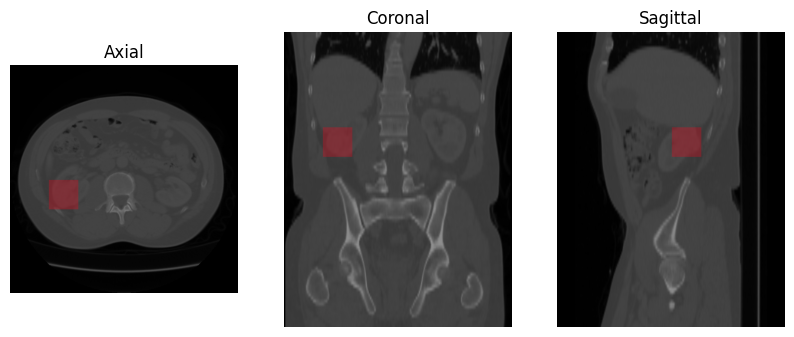

In [21]:
visualize_seed_point(df.iloc[0])